Lukas Valentino/15/2141720032
### Persiapan Data

In [1]:
# import package
import numpy as np
import pandas as pd

In [2]:
# baca data
data = pd.read_csv('data/dataset.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
# pemahaman terhadap data
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Visualisasi Data

In [4]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


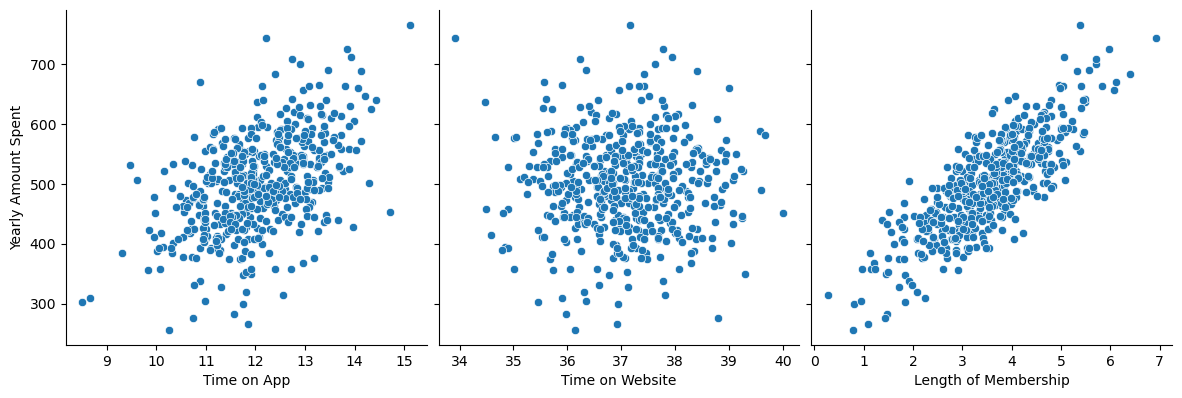

In [5]:
# operasi visualisasi
sns.pairplot(data, x_vars=['Time on App', 'Time on Website','Length of Membership'], 
             y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')
plt.show()

output di atas kurang bisa menunjukkan korelasi antar data dalam x dengan data dalam y. Salah satu solusinya adalah menggunakan heatmap

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

dari bentuk visualisasi di atas terlihat bahwa Length of Membership memiliki korelasi yang paling kuat terhadap Yearly Amount Spent

### Regresi Linier

In [ ]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = data['Length of Membership']
y = data['Yearly Amount Spent']

X.head()

In [ ]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)


In [ ]:
# hasil training dtaset
X_train
y_train

In [ ]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

In [ ]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

In [ ]:
# analisis statistika dari garis regresi
lr.summary()

In [ ]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

### Residual Analysis
dipakai untuk mengetahui tingkat error dari variabel yang dipengaruhi (y)

Error = Actual y value - y predicted value

In [ ]:
# prediksi y_value dari data x yang telah dilatih
y_train_pred = lr.predict(X_train_sm)

res = (y_train - y_train_pred)

In [ ]:
# cek histogram apakah berdistribusi normal atau tidak
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
plt.scatter(X_train,res)
plt.show()

In [ ]:
# prediksi pada data uji dan evaluasi model
X_test_sm = sm.add_constant(X_test)

# prediksi y value yang berkorelasi dengan X_test_sm
y_test_pred = lr.predict(X_test_sm)

# cetak 5 data terprediksi teratas
y_test_pred.head()

In [ ]:
# hitung nilai r^2
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_test_pred)
r_squared

perlu diperhatikan bahwa r^2 dari data trainign adalah 0.669 sedangkan dari data testing adalah 0,612. Hal ini berarti model yang dibentuk cukup stabil (tidak berselisih jauh antara training dengan testing)

In [ ]:
# visualisasi data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()